This tutorial focuses on visualizing simulated results, a critical step in understanding and communicating model behavior. Visualization serves as the blueprint of any experiment—it bridges the gap between raw data and scientific insight. The goal of this tutorial, therefore, is to help you quickly set up, diagnose, and report your simulation outcomes effectively, enabling clear interpretation and compelling presentation of your results.

In [1]:
from apsimNGpy.core.experimentmanager import ExperimentManager
from matplotlib import pyplot as plt
from pathlib import Path
dir_p = Path.cwd().parent.parent/'images'
dir_p.mkdir(exist_ok=True)



In [2]:
model = ExperimentManager(model ='Maize')

# Init the experiment


In [3]:
model.init_experiment(permutation=True)

# Adding factors to the experiment
First, check the manager scripts or inspect model

In [4]:
# inspects the whole json file
model.inspect_file()

└── Simulations: .Simulations
    ├── DataStore: .Simulations.DataStore
    └── Experiment: .Simulations.Experiment
        ├── Factors: .Simulations.Experiment.Factors
        │   └── Permutation: .Simulations.Experiment.Factors.Permutation
        └── Simulation: .Simulations.Experiment.Simulation
            ├── Clock: .Simulations.Experiment.Simulation.Clock
            ├── Field: .Simulations.Experiment.Simulation.Field
            │   ├── Fertilise at sowing: .Simulations.Experiment.Simulation.Field.Fertilise at sowing
            │   ├── Fertiliser: .Simulations.Experiment.Simulation.Field.Fertiliser
            │   ├── Harvest: .Simulations.Experiment.Simulation.Field.Harvest
            │   ├── Maize: .Simulations.Experiment.Simulation.Field.Maize
            │   ├── Report: .Simulations.Experiment.Simulation.Field.Report
            │   ├── Soil: .Simulations.Experiment.Simulation.Field.Soil
            │   │   ├── Chemical: .Simulations.Experiment.Simulation.Field.Soil.Chemi

In [5]:
model.inspect_model('Models.Manager')

['.Simulations.Experiment.Simulation.Field.Sow using a variable rule',
 '.Simulations.Experiment.Simulation.Field.Fertilise at sowing',
 '.Simulations.Experiment.Simulation.Field.Harvest']

Look at the manager script; `.Simulations.Experiment.Simulation.Field.Sow using a variable rule` briefly

In [6]:
model.inspect_model_parameters_by_path('.Simulations.Experiment.Simulation.Field.Sow using a variable rule')


{'Crop': 'Maize',
 'StartDate': '1-nov',
 'EndDate': '10-jan',
 'MinESW': '100.0',
 'MinRain': '25.0',
 'RainDays': '7',
 'CultivarName': 'Dekalb_XL82',
 'SowingDepth': '30.0',
 'RowSpacing': '750.0',
 'Population': '6.0'}

Manager script; `'.Simulations.Experiment.Simulation.Field.Fertilise at sowing'` parameters and values 

In [7]:
model.inspect_model_parameters_by_path('.Simulations.Experiment.Simulation.Field.Fertilise at sowing')

{'Crop': 'Maize', 'FertiliserType': 'NO3N', 'Amount': '160.0'}

# We could set up our experiments along Population and Nitrogen(N) Amount

In [8]:
# Population 
model.add_factor(specification='[Sow using a variable rule].Script.Population = 4, 6, 8, 10',factor_name='Population')
# Nitrogen fertilizers
model.add_factor(specification='[Fertilise at sowing].Script.Amount= 0, 100,150, 200, 250', factor_name='Nitrogen')

# Run the experiment
The experiment can run directly using the instantiated experiment object

In [9]:
model.add_report_variable(variable_spec=['[Clock].Today.Year as year'], report_name='Report')
model.run()

# Inspect the simulated results


In [10]:
res = model.get_simulated_output('Report')
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CheckpointID                      200 non-null    int64  
 1   SimulationID                      200 non-null    int64  
 2   Experiment                        200 non-null    object 
 3   Population                        200 non-null    object 
 4   Nitrogen                          200 non-null    object 
 5   Zone                              200 non-null    object 
 6   Clock.Today                       200 non-null    object 
 7   Maize.Phenology.CurrentStageName  200 non-null    object 
 8   Maize.AboveGround.Wt              200 non-null    float64
 9   Maize.AboveGround.N               200 non-null    float64
 10  Yield                             200 non-null    float64
 11  Maize.Grain.Wt                    200 non-null    float64
 12  Maize.Gr

# By default, the parameter name of each factor is also populated in the data frame

# Statistical summary for each column

In [11]:
res.describe()

,CheckpointID,SimulationID,Maize.AboveGround.Wt,Maize.AboveGround.N,Yield,Maize.Grain.Wt,Maize.Grain.Size,Maize.Grain.NumberFunction,Maize.Grain.Total.Wt,Maize.Grain.N,Maize.Total.Wt,year
count,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.0,10.500000,1067.600206,10.239469,4765.995363,476.599536,0.245769,1890.470249,476.599536,6.187685,1167.632796,1995.500000
std,0.0,5.780751,607.686584,6.299485,3093.295392,309.329539,0.073753,1077.127429,309.329539,4.118276,656.486381,2.879489
min,1.0,1.000000,51.423456,0.320986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.721510,1991.000000
25%,1.0,5.750000,708.023479,5.095767,2535.993006,253.599301,0.223099,979.352980,253.599301,3.051965,774.862931,1993.000000
50%,1.0,10.500000,987.749088,9.423852,3894.863108,389.486311,0.274101,1855.994293,389.486311,5.112196,1104.093752,1995.500000
75%,1.0,15.250000,1579.116949,15.402366,7819.712885,781.971288,0.299073,2861.250716,781.971288,10.372698,1705.820275,1998.000000
max,1.0,20.000000,2277.481374,22.475693,10881.111792,1088.111179,0.315281,3726.740206,1088.111179,13.852686,2457.083319,2000.000000


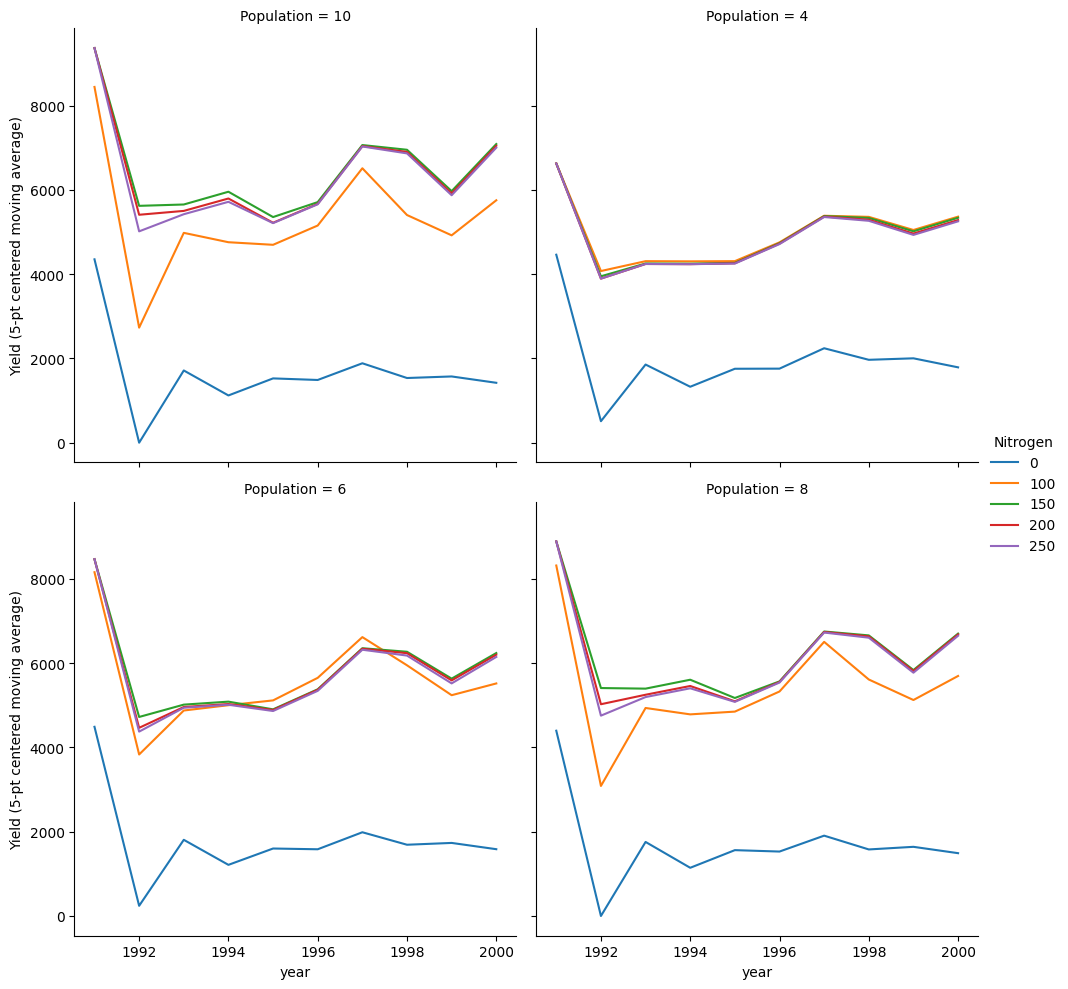

In [12]:
model.plot_mva(table='Report', response='Yield', time_col='year', col_wrap=2, palette='tab10', window=5,
             errorbar=None, estimator='mean', grouping=('Nitrogen', 'Population'), hue='Nitrogen', col='Population')
plt.savefig(dir_p/'mva_hue_nitrogen_grp_n_p.png', dpi=600)

# Categorical plots

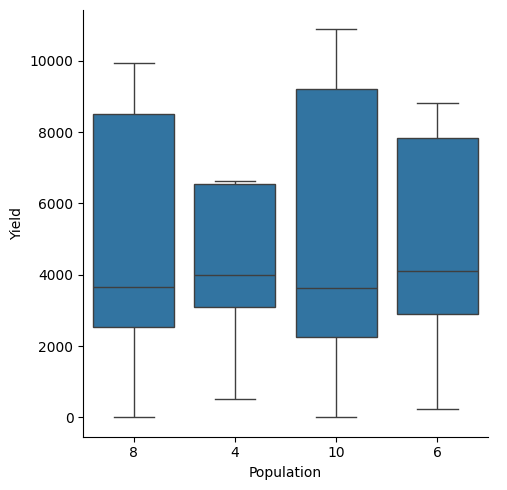

In [13]:
model.cat_plot(table = 'Report', y='Yield', x= 'Population', kind = 'box')
plt.savefig(dir_p/'cat_plot_no_hue.png', dpi=600)

Add hue for comparison

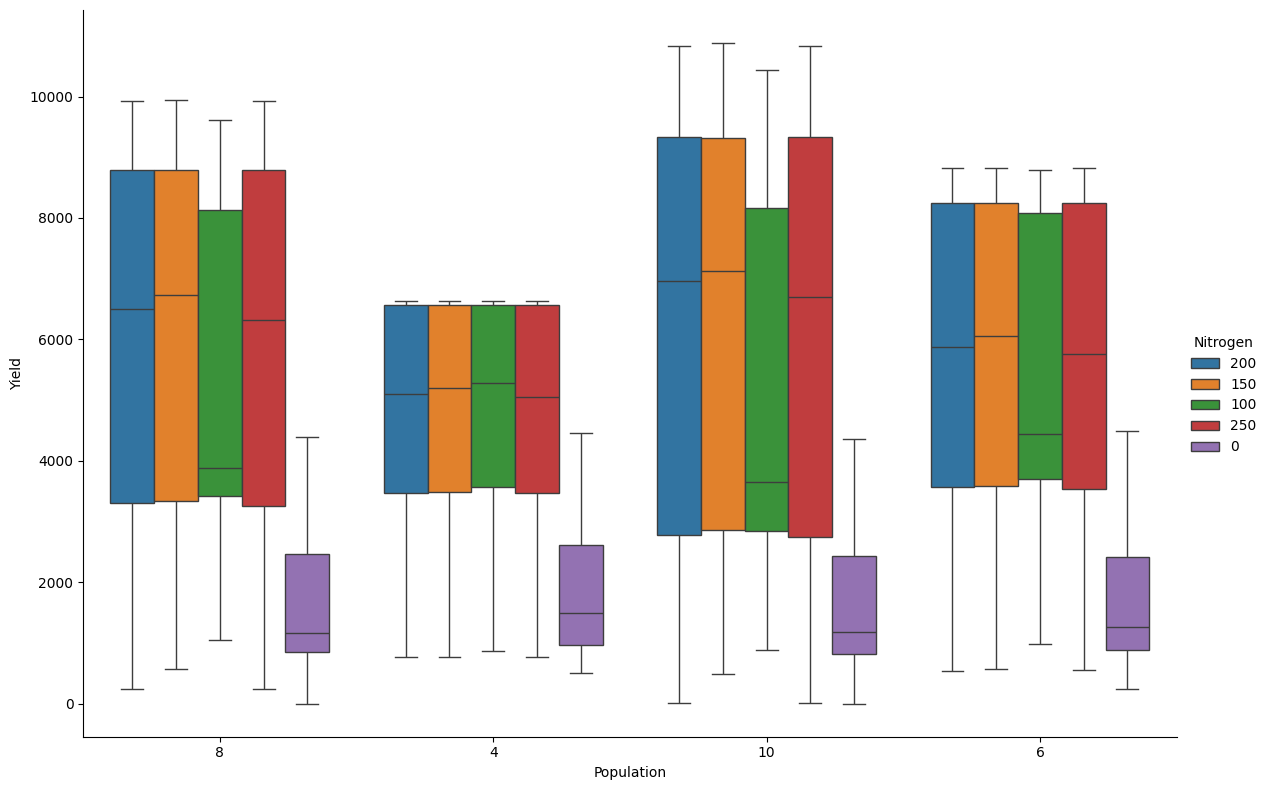

In [14]:
model.cat_plot(table = 'Report', y='Yield', x= 'Population', palette='tab10',
               kind = 'box', hue= 'Nitrogen', height=8, aspect=1.5)
plt.savefig(dir_p/'hue_nitrogen.png', dpi=600)

Bar plot


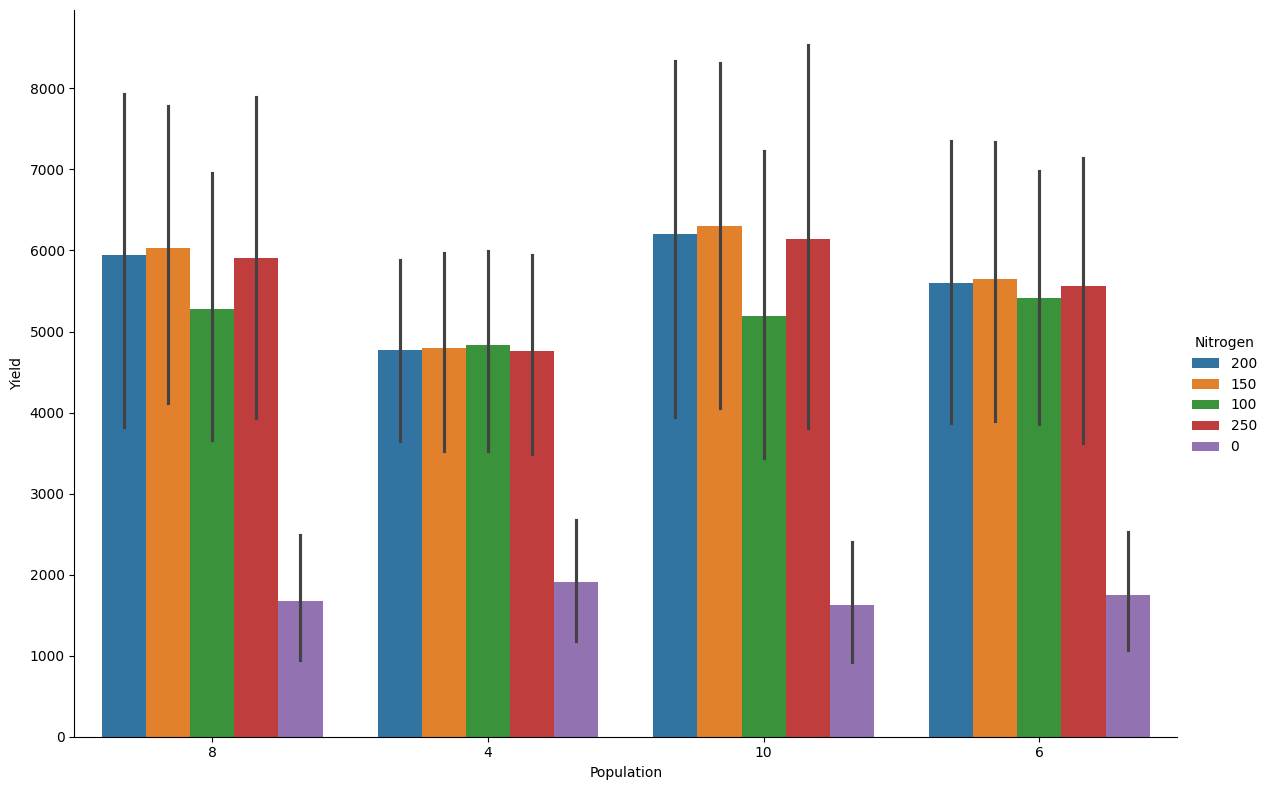

In [15]:
p = Path(r'D:\package\apsimNGpy\apsimNGpy\example_jupiter_notebooks\images')
model.cat_plot(table = 'Report', y='Yield', x= 'Population', kind = 'bar', hue= 'Nitrogen', height=8, aspect=1.5)
plt.savefig(p/'bar_plots_with_hue.png', dpi=600)

In [16]:
dir_p

WindowsPath('D:/package/apsimNGpy/apsimNGpy/images')

Changing statistical estimators.
The example below shows how to switch estimators, and after the change to sum, the y-axis is now inflated

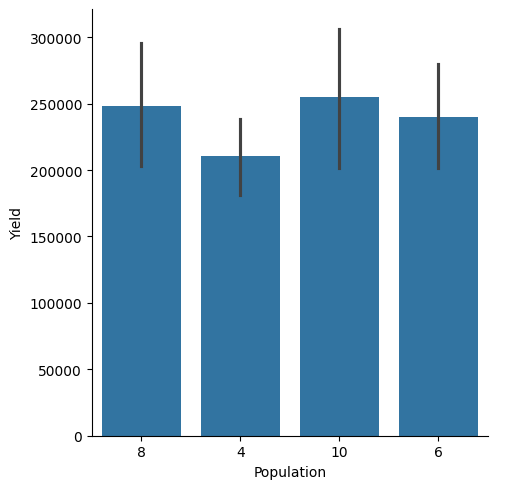

In [17]:
model.cat_plot(table = 'Report', y='Yield', x= 'Population', kind = 'bar', estimator='sum')
plt.savefig(p/'bar_plots_with_estimator.png', dpi=600)

Errorbar can also be switched off. The example below shows how to do it


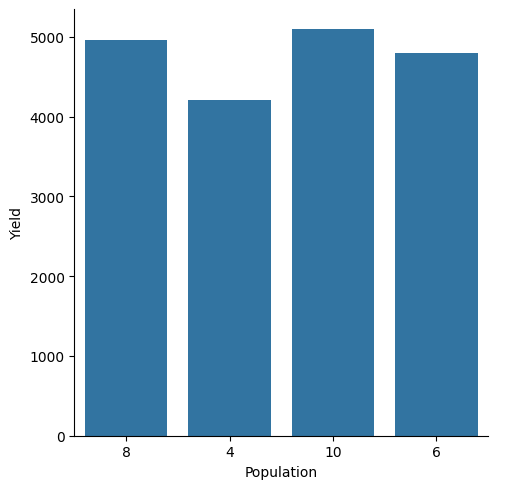

In [18]:
model.cat_plot(table = 'Report', y='Yield', x= 'Population', kind = 'bar', errorbar=None)

If you want to plot in a different unit or apply on-the-fly calculations, all plotting methods allow simple mathematical expressions to be passed, as shown below.


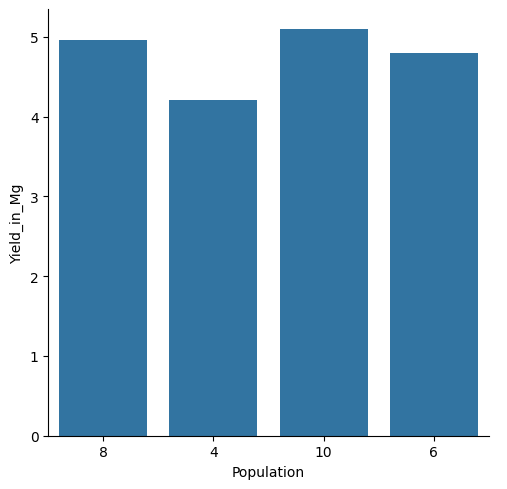

In [24]:
model.cat_plot('Report', expression="Yield_in_Mg = Yield/1000",
               y='Yield_in_Mg', x= 'Population', kind = 'bar', errorbar=None)
plt.savefig(p/'exp.png', dpi=600)

# Tidy up the plots for reporting

The heavy lifting is done; now polish the figure—adjust labels, titles, and size. All plotting methods on ApsimModel and ExperimentManager return a seaborn.axisgrid.FacetGrid, so you can keep customizing afterward. Because Seaborn sits on Matplotlib, any Matplotlib styling you pass (or apply later) still works.

In [ ]:
g= model.cat_plot(table = 'Report', y='Yield', x= 'Population', kind='bar') 
g.set_axis_labels(r"Population density (m$^{-2}$)", r"Maize yield (kg ha$^{-1}$)")
g.set_titles("Yield vs population density")


# Passing a custom dataset

Because apsimNGpy plotting wraps Seaborn, you don’t need extra imports for most advanced visuals. When you want to pre-compute values or reshape data yourself, use the table argument: it accepts None, a table name (str) from the model’s database, or a pandas.DataFrame.

table=None:  uses self.results from the model.

table="Report" (str): loads that table from the DB.

table=df (DataFrame):  uses your custom, in-memory data.

Below shows how to convert a numeric nitrogen Amount to an ordered categorical (for cleaner legends/ordering) and pass it straight into any plotter:

In [ ]:
import pandas as pd

# Example: start from model results (or load a table)
df = model.results.copy()  # or: df = model.get_simulated_output("Report")

# Convert nitrogen rate to an ordered categorical for consistent ordering/legend
bins = [0, 50, 100, 150, 200, 250]
labels = ["0–50", "51–100", "101–150", "151–200"]
# 1) Coerce to numeric
df = df.copy()
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

# 2) Handle NaNs (drop or label them)
# Option A: drop rows with invalid Amount
df = df.dropna(subset=["Amount"])
# Option B: keep them and fill a placeholder after cut

# 3) Define consistent bins & labels
bins   = [0, 50, 100, 150, 200]           # strictly increasing
labels = ["0–50", "51–100", "101–150", "151–200"]  # len=4 = len(bins)-1

# 4) Cut (older pandas? remove ordered= and set later)
df["N_rate_class"] = pd.cut(
    df["Amount"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True,  )         # default; change to False if you want left-closed intervals
    # ordered=True  )      # comment out if your pandas 

# Optionally, sort by the new category
df = df.sort_values("N_rate_class")

# Use the custom DataFrame directly via `table=...`
# Example 1: line series
model.series_plot(
    table=df,
    x="year",
    y="Yield",
    hue="N_rate_class", errorbar=None

)
plt.tight_layout()

In [ ]:

# Example 2: categorical plot (e.g., box/violin via catplot)
model.cat_plot(
    table=df,
    x="N_rate_class",
    y="Yield",
    kind="box"
)


In [ ]:
from apsimNGpy.core.config import apsim_version
from apsimNGpy import version
from apsimNGpy.settings import logger
print(f"Notebook generated by;\n APSIM version: `{apsim_version()}`\n apsimNGpy version {version.version}")